# Simple Regression
## Goal: Predicting Matathon Running Time from Age

We apply simple linear regression to build a model to predict marathon running time from the runners age.

First, we load all the libraries we need.

## Note for Windows 10 users (Thanks to Alessandro Vetere)
You need to apply a patch to the file font_manager.py to successfully import matplotlib http://stackoverflow.com/questions/34004063/error-on-import-matplotlib-pyplot-on-anaconda3-for-windows-10-home-64-bit-pc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then, we load the results from a 2016 marathon that has been previously anonymized.

In [2]:
df = pd.read_excel('Marathon01.xls')

Let's print the first ten rows

In [3]:
df.head(10)

,Rank,Bib,LastName,FirstName,Team,Nationality,Category,PositionInCategory,PositionInGenre,OfficialTime,Delay
0,1,3,e41a852e734c36524b4521e950e9d4f06c5758db5437bf...,4d008e38ce605d4be8f5d35eeda73183b71b6bcc0022be...,bbefcdd6b8078b50c4278bda714a7abbcaab59892b4463...,ita,SM40,1,1,2:24:00,+0:00
1,2,1526,398c1c567d9615aa2c8456d24ded9f37ffbab1a59db929...,c3becf83a409df2ad36b60d2792495a71a587f41b265b6...,68d326a411631cf6414f3b4b105f8d46b1ef53c8296908...,bel,SM,1,2,2:25:53,+1:53
2,3,7,289d400f292ec13d46bb57ca301f46ffa7663fa839b6dd...,d4bf3293b07767c458c65379e034a5b5d6baeec0bd04ff...,84cf4bb3281bd7f562125ac194aade35f69f6deae80cc9...,ita,SM,2,3,2:26:23,+2:23
3,4,8,9b6097201c843b9d762c1651fba184b934da494fea5234...,099bb7dd6d080a9f4a769be4fddb40d7c078a046c02dd7...,ee3808b948f189a114c3445f3b2877ebb0c17368798109...,ita,SM,3,4,2:27:07,+3:07
4,5,9,33df4ba3be0630d93a189a2d1574195d71ecfa9a28b390...,d887599ce44249ce921295ebbd0a5d3f9548ec20d59af6...,3244ab7102293e3e8d1f973d2d7ecf691ef461f68883b6...,ita,SM,4,5,2:28:34,+4:34
5,6,5,f27f2b877d7ccdf0408bbf4811162b6173523f42ccefc1...,4548376649d53baab338e043f30d638ae4ac1ef0b9547e...,1e2a3130c28c0b346651762bcacd6ed8c107f644ebc5c2...,ita,SM40,2,6,2:36:40,+12:40
6,7,13,012dcf7c901f4816bf0d36cf0266efc0e27593bf2f8afb...,2272bb3d111eb20706214def10eef4e5809d81dcd37550...,25deb62179cdcc3f640a56b947b2f3b10b1f515258866d...,gbr,SM35,1,7,2:37:00,+13:00
7,8,12,9a069e419318b028a64f73bd97780bf25571d2932f89c9...,1e03e8457083dad3ac900257cba66486c5678a4fec479f...,bfc0791a4781886c34dfcb0b3edd0f68e5ea864aa4e5be...,gbr,SM40,3,8,2:37:24,+13:24
8,9,1613,d56fc9c2ef412f17b92aaa1b59f4ba87bbc41920a69073...,f69628cbfe51ed629db04cea17c1d55f83d7aab3e0e9c9...,10d1738d8f853eb1cc03843eea8da6734ce415b0d73c43...,ita,SM35,2,9,2:38:28,+14:28
9,10,25,b227980051610a88d43dfad33c35a2026e3de4084fc0d7...,18db7beb9be2ffcf77ee247d486bc9e80467ff43ee141e...,6b6830884f7a55e47b8bda3f8688fa369458ee1fc8c214...,ita,SM45,1,10,2:38:48,+14:48


Let's print also the input variables, 

In [4]:
df.columns

Index(['Rank', 'Bib', 'LastName', 'FirstName', 'Team', 'Nationality',
       'Category', 'PositionInCategory', 'PositionInGenre', 'OfficialTime',
       'Delay'],
      dtype='object')

And the dimensions of the data 

In [5]:
print("The data set contains ",df.shape[0]," rows described by ",df.shape[1]," variables") 

The data set contains  1391  rows described by  11  variables


We load some preprocessing functions we need to use the input variables to create more interesting variables such as,
- extract the runner's genre and age from the FIDAL category (e.g., SM_35 becomes Male, 35)
- the running time expressed in seconds
- the running time expressed in hours
- the average running speed for 1km
- the delay in seconds from the first runner who reached the finish line

And we apply all the preprocessing.

In [7]:
from PreprocessRunnersStats import *
cdf = PreprocessRunnersStats(df)

First, we plot the raw data to get an idea of what we are dealing with.

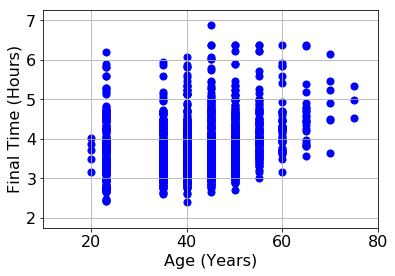

In [8]:
x = cdf['Age']
y = cdf['TimeInHours']

font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.ylim((1.75,7.25))
plt.xlim((10,80))
plt.xlabel("Age (Years)")
plt.ylabel("Final Time (Hours)")
plt.scatter(x, y, color='blue', marker='o', s=50)
plt.grid()

The points are aligned based on age groups for instance, all the data for runners between 35 and 39 appears on the same line since the marathon registration cluster runners in such classes. More information about the age categories are available at, http://www.fidal.it/content/Le-categorie-di-tesseramento-atleti/49913

These points cannot be used for ordinary least square linear regression since of the same input x we have multiple outputs. So for the very first analysis we compute the average running time and try to build a model that predicts that value. For this purpose, we use a function that given the data computes several statistics.

In [9]:
qdf = ComputeStats(cdf,'TimeInHours')
qdf

,Age,Average,FirstQuartile,SecondQuartile,StdDev,StdErr,ThirdQuartile
0,20.0,3.649167,3.478889,3.709444,0.306483,0.061297,3.881111
1,23.0,3.737560,3.154514,3.710139,0.772945,0.004601,4.246389
2,35.0,3.704929,3.293889,3.607222,0.597854,0.002730,4.116250
3,40.0,3.792429,3.369167,3.736944,0.637603,0.002176,4.091389
4,45.0,3.828979,3.391042,3.690417,0.686963,0.002290,4.072986
5,50.0,3.899531,3.418056,3.801389,0.669697,0.003072,4.239861
6,55.0,4.165720,3.711667,4.018611,0.669162,0.006373,4.439167
7,60.0,4.335983,3.927639,4.241250,0.668317,0.013366,4.572292
8,65.0,4.589287,4.086111,4.488333,0.705645,0.030680,4.802500
9,70.0,4.914603,4.487361,4.915278,0.747131,0.106733,5.361528


Let's plot the average running time.

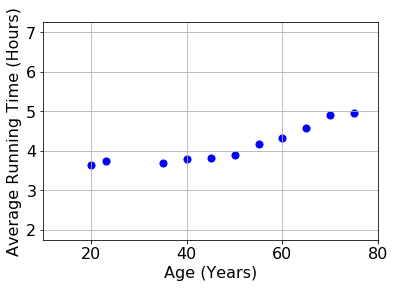

In [10]:
x = qdf['Age']
y = qdf['Average']

font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.ylim((1.75,7.25))
plt.xlim((10,80))
plt.xlabel("Age (Years)")
plt.ylabel("Average Running Time (Hours)")
plt.scatter(x, y, color='blue', marker='o', s=50)
plt.grid()

We now build a simple regression model using least squares and plot it.

In [11]:
from sklearn import linear_model

x1 = np.array(qdf['Age'])
y1 = qdf['Average']

# needed by the new scikit-learn version
x1 = x1.reshape(-1,1)

# build the regression model using basic least squares
regr = linear_model.LinearRegression()
regr.fit(x1, y1)

# predicted y
yp = regr.predict(x1)

rss = round(sum((y1-yp)**2),3)

Text(0.5,1,'Time = 2.946 + 0.024*Age')

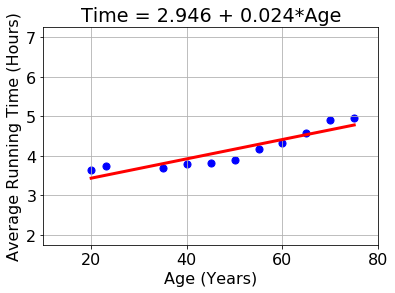

In [12]:
x = qdf['Age']
y = qdf['Average']

font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.ylim((1.75,7.25))
plt.xlim((10,80))
plt.xlabel("Age (Years)")
plt.ylabel("Average Running Time (Hours)")
plt.scatter(x, y, color='blue', marker='o', s=50)
plt.plot(x1,yp, color='red',linewidth=3)
plt.grid()

coeff = round(regr.coef_[0],3)
intercept = round(regr.intercept_,3)

eq = "Time = " + str(intercept)
if (coeff>0):
    eq = eq + " + "
eq = eq + str(coeff)+"*Age"
plt.title (eq)





## Questions
- What is the practical meaning of the intercept?
- What is the practical meaning of the coefficient?
- Do you foresee any issue about these two terms?

## Enriching Data with Domain Knowledge
We know that the age categories group together people of different ages. For example, SM_35 is associated to males between the are of 35 and 40 excluded. Thus, the data we plotted at the beginning are not a correct representation of our data. We can insert what we know about the age groups to the training data. We modify the age of individuals by randomly generating an age from the corresponding interval. For instance, we substitute an age of 35 with a random age selected between 35 and 40 (excluded).

In [13]:
import random 

def JitterAge(age):
    if (age>=35):
        return age + random.uniform(0,5)
    if (age==20):
        return age + random.uniform(0,2)
    if (age==23):
        return age + random.uniform(0,12)

jdf = cdf
jdf['Age'] = cdf['Age'].apply(JitterAge)

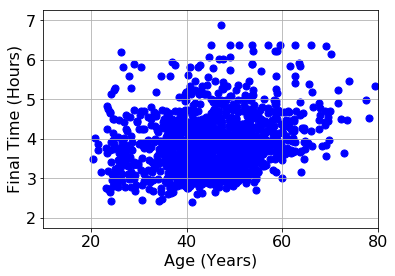

In [14]:
x = jdf['Age']
y = jdf['TimeInHours']

font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.ylim((1.75,7.25))
plt.xlim((10,80))
plt.xlabel("Age (Years)")
plt.ylabel("Final Time (Hours)")
plt.scatter(x, y, color='blue', marker='o', s=50)
plt.grid()

In [15]:
from sklearn import linear_model

x2 = jdf['Age']
y2 = jdf['TimeInHours']

# needed by the new scikit-learn version
x2 = x2.values.reshape(-1,1)

# build the regression model using basic least squares
regr = linear_model.LinearRegression()
regr.fit(x2, y2)

# predicted y
jittered_prediction = regr.predict(x2)


Text(0.5,1,'Time = 3.108 + 0.017*Age')

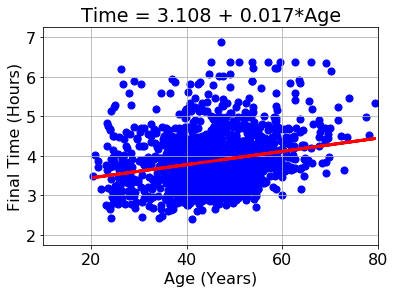

In [16]:
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
plt.ylim((1.75,7.25))
plt.xlim((10,80))
plt.xlabel("Age (Years)")
plt.ylabel("Final Time (Hours)")
plt.scatter(x2, y2, color='blue', marker='o', s=50)
plt.plot(x2,jittered_prediction, color='red',linewidth=3)
plt.grid()

coeff = round(regr.coef_[0],3)
intercept = round(regr.intercept_,3)

eq = "Time = " + str(intercept)
if (coeff>0):
    eq = eq + " + "
eq = eq + str(coeff)+"*Age"

plt.title (eq)


